In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Problem Statement
By using Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance predict the credit limit....

# Data Gathering

In [2]:
df=pd.read_csv('credit.csv')
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


# EDA

In [3]:
# checking shape of the dataframe
df.shape

(400, 11)

In [4]:
# checking for the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [5]:
# Checking for the statistical information 
df.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [6]:
# Checking for the null values in the given dataset
df.isna().sum()

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

In [7]:
#Dropping unimportant features
df.drop('Ethnicity',axis=1,inplace=True)
df.drop('Student',axis=1,inplace=True)

Imoutation of Categorical data

In [8]:
df['Gender'].value_counts().to_dict()

{'Female': 207, 'Male': 193}

In [9]:
df['Gender'].replace({'Female':0, 'Male':1},inplace=True)

In [10]:
df['Married'].value_counts().to_dict()

{'Yes': 245, 'No': 155}

In [11]:
df['Married'].replace({'Yes':1, 'No':0},inplace=True)

In [12]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Married,Balance
0,14.891,3606,283,2,34,11,1,1,333
1,106.025,6645,483,3,82,15,0,1,903
2,104.593,7075,514,4,71,11,1,0,580
3,148.924,9504,681,3,36,11,0,0,964
4,55.882,4897,357,2,68,16,1,1,331


In [13]:
# checking for the pearson correlation coefficient
df.corr()

,Income,Limit,Rating,Cards,Age,Education,Gender,Married,Balance
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.010738,0.035652,0.463656
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,-0.009397,0.031155,0.861697
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,-0.008885,0.036751,0.863625
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.022658,-0.009695,0.086456
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,-0.004015,-0.073136,0.001835
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,0.005049,0.048911,-0.008062
Gender,0.010738,-0.009397,-0.008885,0.022658,-0.004015,0.005049,1.000000,-0.012452,-0.021474
Married,0.035652,0.031155,0.036751,-0.009695,-0.073136,0.048911,-0.012452,1.000000,-0.005673
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,-0.021474,-0.005673,1.000000


<AxesSubplot:>

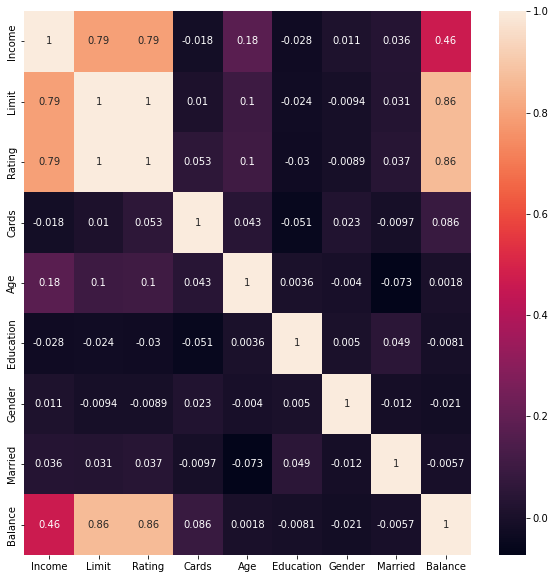

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

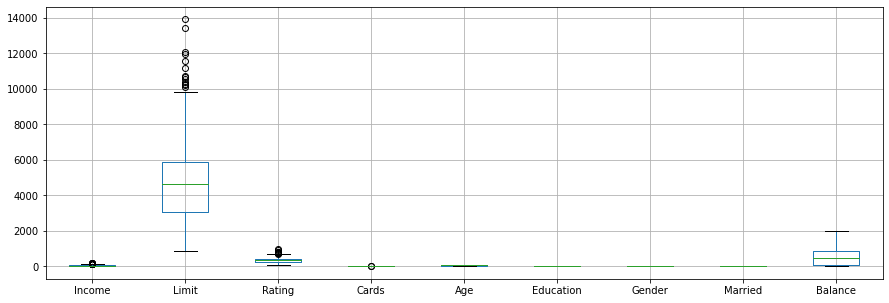

In [15]:
# checking for the outliers
plt.figure(figsize=(15,5))
df.boxplot()

By above Boxplot we observe that there are some outliers in the target column so there is no need to handle it if the outliers are present in the independent variables then we have to handle that outliers

In [16]:
x=df.drop('Limit',axis=1)
y=df['Limit']

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Train test split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Model building

In [19]:
model=LinearRegression()

In [20]:
model.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred=model.predict(x_test)
r2=r2_score(y_test,y_pred)
print("R-squared value :-",r2)
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared error:-",mse)
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute error:-",mae)
rmse=np.sqrt(mse)
print("Root mean square error:-",rmse)

R-squared value :- 0.9936521997324184
Mean Squared error:- 28271.524800779967
Mean Absolute error:- 134.78753517828395
Root mean square error:- 168.14138336762895


In [22]:
y_pred_train=model.predict(x_train)
r2=r2_score(y_train,y_pred_train)
print("R-squared value :-",r2)
mse=mean_squared_error(y_train,y_pred_train)
print("Mean Squared error:-",mse)
mae=mean_absolute_error(y_train,y_pred_train)
print("Mean Absolute error:-",mae)
rmse=np.sqrt(mse)
print("Root mean square error:-",rmse)

R-squared value :- 0.9960873892381731
Mean Squared error:- 21629.14449856174
Mean Absolute error:- 120.05631868709823
Root mean square error:- 147.06850274127953


In [23]:
x.head(1).T

,0
Income,14.891
Rating,283.000
Cards,2.000
Age,34.000
Education,11.000
Gender,1.000
Married,1.000
Balance,333.000


# Checking the model on user input

In [24]:
Income=int(input("Enter your current income in $:-"))
Rating=int(input("Enter your current rating:-"))
Cards=int(input("Currently how many cards do you have:-"))
Age=int(input("Enter your current age:-"))
Education=int(input("Enter your Education:-"))
Gender=int(input("Enter your gender:- \n 0 for female \n 1 for male :---"))
Married=int(input("Are you Married:- \n 0 for no \n 1 for yes :---"))
Balance=int(input("what is your current bank balance:-"))

Enter your current income in $:-44
Enter your current rating:-444
Currently how many cards do you have:-3
Enter your current age:-45
Enter your Education:-14
Enter your gender:- 
 0 for female 
 1 for male :---1
Are you Married:- 
 0 for no 
 1 for yes :---0
what is your current bank balance:-666


In [27]:
array=np.zeros(len(x.columns))
array[0]=Income
array[1]=Rating
array[2]=Cards
array[3]=Age
array[4]=Education
array[5]=Gender
array[6]=Married
array[7]=Balance
pred=model.predict([array])[0].round(2)
print(f"Congratulations you got the credit limit is upto:-{pred}$")

Congratulations you got the credit limit is upto:-6048.78$


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
import pickle 
with open('Credit_limit_model.pkl','wb')as f:
    pickle.dump(model,f)